In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Importing required functions from sklearn

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [5]:
# Importing the data 

In [6]:
bnk = pd.read_csv(r"D:\Data science\Assignments docs\Logistic Regression\bank_data.csv", sep=",")
bnk.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bnk.shape

(41188, 21)

In [8]:
bnk.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
bnk.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# summarize the number of unique values in each column

In [11]:
print(bnk.nunique())

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [12]:
# Categorizing the dependent variable "y" values into 0s and 1s

In [13]:
bnk.y = pd.factorize(bnk.y)[0]
bnk.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

##  Data Exploration

In [14]:
bnk["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [15]:
# Countplots of different variables

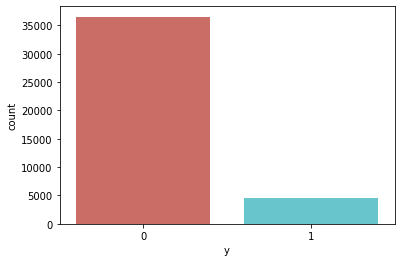

In [16]:
sb.countplot(x="y", data=bnk, palette='hls')

In [17]:
Subscription_percentage = (len(bnk[bnk["y"]==1])/len(bnk))*100              

In [18]:
print("Percentage of subrcibed clients:", Subscription_percentage)

Percentage of subrcibed clients: 11.265417111780131


In [19]:
# Subscription percentage is 11% compared to 89% for non_subscription

In [20]:
bnk.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [21]:
# Observations:
# The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
# The pdays (days since the customer was last contacted) is lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.

In [22]:
bnk.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [23]:
bnk.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750,0.150000


In [24]:
bnk.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [25]:
# Visualizations

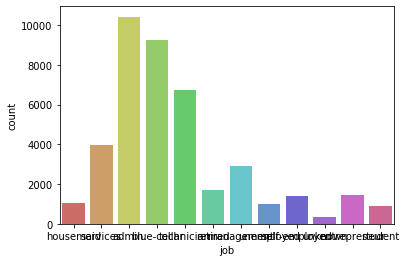

In [26]:
sb.countplot("job", data=bnk, palette='hls')

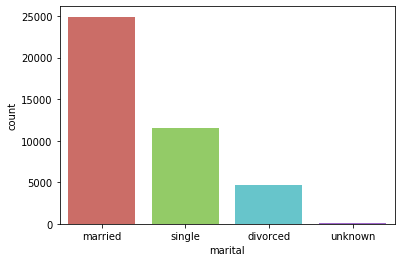

In [27]:
sb.countplot("marital", data=bnk, palette='hls')

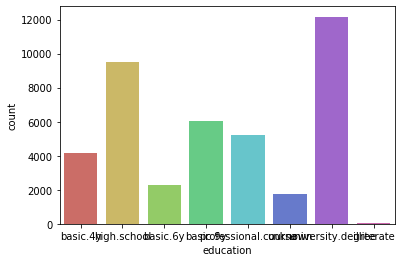

In [28]:
sb.countplot("education", data=bnk, palette='hls')

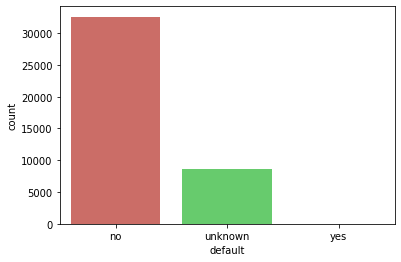

In [29]:
sb.countplot("default", data=bnk, palette='hls')

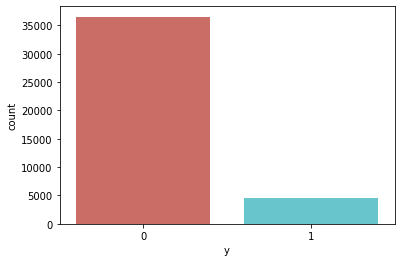

In [30]:
sb.countplot("y", data=bnk, palette='hls')

In [31]:
# Cross-tabulation of independent varibales with respect to dependent variable

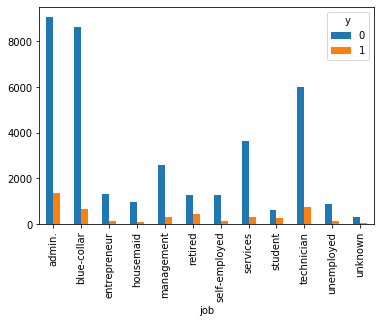

In [32]:
pd.crosstab(bnk.job, bnk.y).plot(kind="bar")

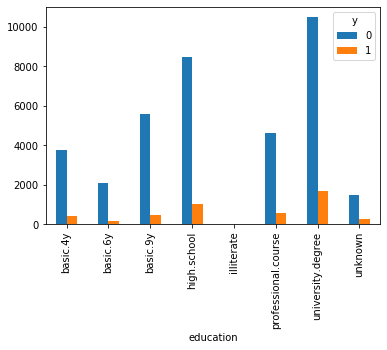

In [33]:
pd.crosstab(bnk.education,bnk.y).plot(kind="bar")

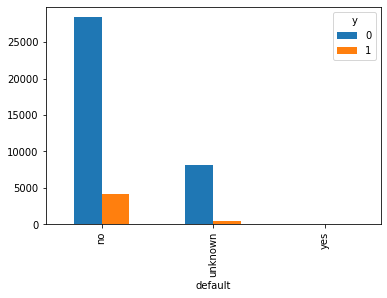

In [34]:
pd.crosstab(bnk.default,bnk.y).plot(kind="bar")

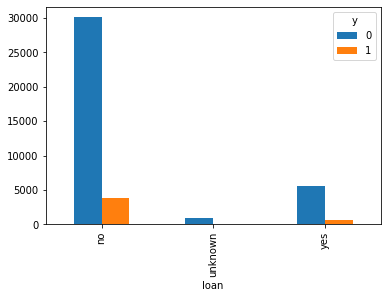

In [35]:
pd.crosstab(bnk.loan, bnk.y).plot(kind="bar")

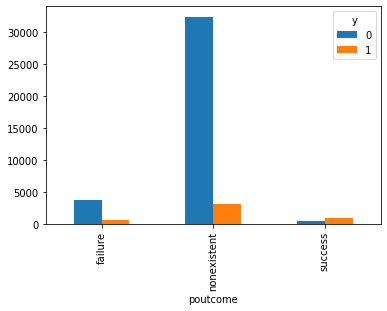

In [36]:
pd.crosstab(bnk.poutcome, bnk.y).plot(kind="bar")

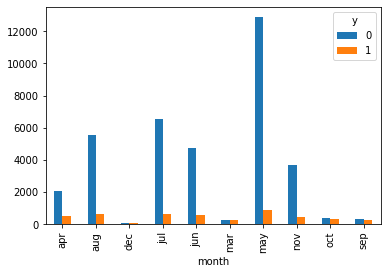

In [37]:
pd.crosstab(bnk.month, bnk.y).plot(kind="bar")

In [38]:
# Histograms of "Age"

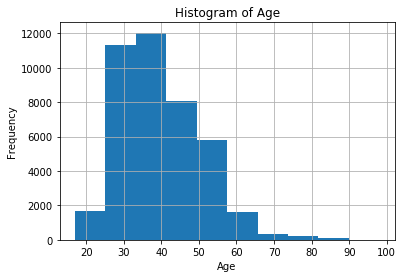

In [39]:
bnk.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [40]:
# Boxplots of one variable with respect to other

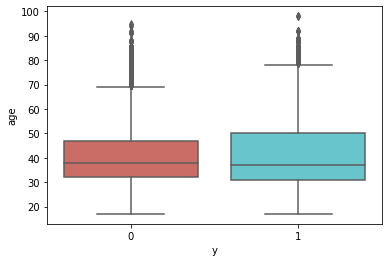

In [41]:
sb.boxplot("y","age", data=bnk,palette='hls')

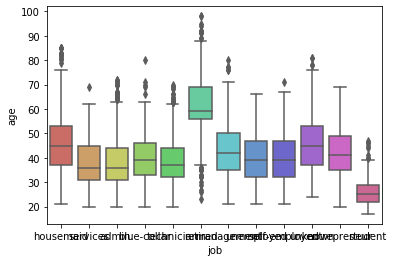

In [42]:
sb.boxplot("job","age", data=bnk,palette='hls')

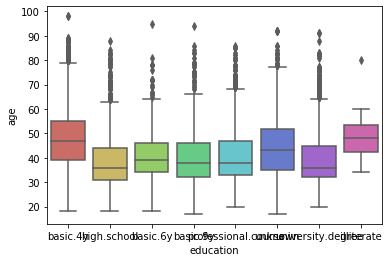

In [43]:
sb.boxplot("education","age", data=bnk,palette='hls')

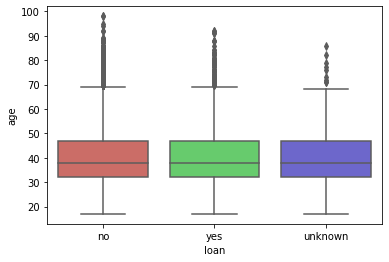

In [44]:
sb.boxplot("loan","age", data=bnk,palette='hls')

In [45]:
# Removing the unwanted columns from the dataset

In [46]:
bnk.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [47]:
# The columns which are less useful and carries less information are removed like contact, month, day_of_week, duration, campaign, pdays, previous, emp.var.rate,cons.price.idx,cons.conf.idx, euribor3m, nr.employed 

In [48]:
bank = bnk.iloc[:, [0,1,2,3,4,5,6,14,20]]
bank.head()

,age,job,marital,education,default,housing,loan,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,0
1,57,services,married,high.school,unknown,no,no,nonexistent,0
2,37,services,married,high.school,no,yes,no,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,nonexistent,0
4,56,services,married,high.school,no,no,yes,nonexistent,0


In [49]:
# Creating the dummy variables for categories

In [50]:
bank.job = pd.factorize(bank.job)[0]

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [51]:
bank.marital = pd.factorize(bank.marital)[0]

In [52]:
bank.education = pd.factorize(bank.education)[0]

In [53]:
bank.default = pd.factorize(bank.default)[0]

In [54]:
bank.housing = pd.factorize(bank.housing)[0]

In [55]:
bank.loan = pd.factorize(bank.loan)[0]

In [56]:
bank.poutcome = pd.factorize(bank.poutcome)[0]

In [57]:
# Dataframe after creating the dummy variables

In [58]:
bank.head()

,age,job,marital,education,default,housing,loan,poutcome,y
0,56,0,0,0,0,0,0,0,0
1,57,1,0,1,1,0,0,0,0
2,37,1,0,1,0,1,0,0,0
3,40,2,0,2,0,0,0,0,0
4,56,1,0,1,0,0,1,0,0


In [59]:
bank.isnull().sum()                 # To get the count of null values in the data 

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
poutcome     0
y            0
dtype: int64

In [60]:
# No NA values in the dataset

In [61]:
bank.shape

(41188, 9)

In [62]:
# Splitting the data based on independent and dependent variables

In [63]:
X = bank.loc[:, bank.columns != 'y']
Y = bank.loc[:, bank.columns == 'y']

In [64]:
# Since in the dataset, the no of subscription is very low compared to non-subcription.Dataset in unbalanced. 
# Hence the data need to be oversampled using the SMOTE.

In [65]:
from imblearn.over_sampling import SMOTE

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [66]:
os = SMOTE(random_state=0)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

In [68]:
os_data_x,os_data_y=os.fit_sample(X_train, Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [69]:
os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [70]:
os_data_x

,age,job,marital,education,default,housing,loan,poutcome
0,37,6,0,6,1,0,1,0
1,54,6,2,6,1,1,0,0
2,49,3,0,3,1,0,0,0
3,30,1,0,6,0,1,0,0
4,23,3,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
51153,39,4,0,1,0,0,0,0
51154,32,3,1,1,0,0,0,0
51155,59,5,0,1,0,1,0,0
51156,47,10,0,6,0,0,0,1


In [71]:
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))

Number of no subscription in oversampled data 25579
Number of subscription 25579


In [72]:
# Now the dataset consists of equal number of subcriptions and non-subscriptions, hence the data is balanced

In [73]:
x,y = os_data_x,os_data_y

In [74]:
# Splitting the data for training and testing

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=0)

In [76]:
x_train.shape

(35810, 8)

In [77]:
x_test.shape

(15348, 8)

In [78]:
# Building the LogisticRegression  model

In [79]:
classifier = LogisticRegression()

In [80]:
classifier.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [81]:
classifier.coef_                           # coefficients of features 

array([[ 0.00778751,  0.04575858, -0.21637148,  0.01256255, -1.79612347,
        -0.31298677, -0.75459762,  0.81746309]])

In [82]:
classifier.predict_proba(x_train)          # Probability values 

array([[0.42458944, 0.57541056],
       [0.40521811, 0.59478189],
       [0.85434215, 0.14565785],
       ...,
       [0.45505592, 0.54494408],
       [0.12088468, 0.87911532],
       [0.5348552 , 0.4651448 ]])

In [83]:
# Predicting y values using the model

In [84]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [85]:
y_pred.shape

(15348,)

In [86]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Confusion matrix 

In [87]:
conf_mat = confusion_matrix(y_test["y"],y_pred)        # Confusion matrix
conf_mat

array([[4364, 3287],
       [2314, 5383]], dtype=int64)

In [88]:
pd.crosstab(y_pred,y_test["y"])

y,0,1
row_0,,
0,4364,2314
1,3287,5383


In [ ]:
# Accuracy of the model

In [89]:
accuracy = sum(y_test["y"]==y_pred)/y_test.shape[0]
accuracy

0.6350664581704457